# z1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.misc
from collections import Counter
from sklearn.decomposition import PCA


def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return R, m
    

In [2]:
def generateData(N,d,K,p,mi,Sigma):
    A = np.linalg.cholesky(Sigma.T).T
    distributions = np.random.choice(np.arange(0,K), N, p=p)
    X = np.random.randn(d,N)
    for i in range(N):
        X[:,i] = mi[:,distributions[i]] + np.dot(A[:,:,distributions[i]], X[:,i])
    return X, distributions

def plotData_KMeans(N,d,K,p,mi,Sigma):
    X, groups = generateData(N,d,K,p,mi,Sigma)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.scatter(X[0,:], X[1,:], marker='.', c=groups)
    plt.subplot(122)
    R, m = KMeans(K, X)
    plt.scatter(X[0,:], X[1,:], marker='.', c=m)
    plt.scatter(R[0,:], R[1,:], c='red')

N = 5000

## a)

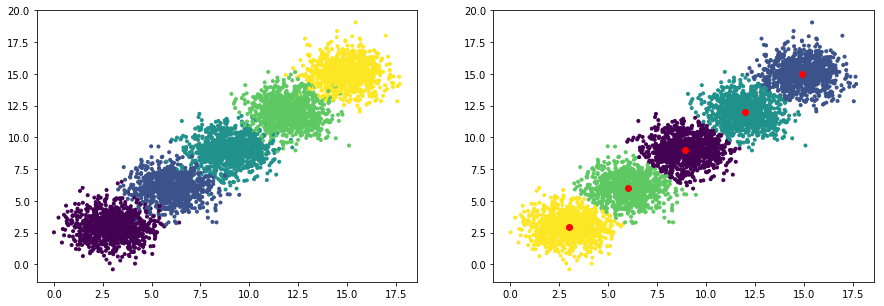

In [3]:
d = 2
K = 5
p = 1/K * np.ones(K)
mi = 3 * np.ones((d,1)) * np.arange(1,K+1)
Sigma = np.array([np.eye(d) for i in range(K)]).T

plotData_KMeans(N,d,K,p,mi,Sigma)


## b)

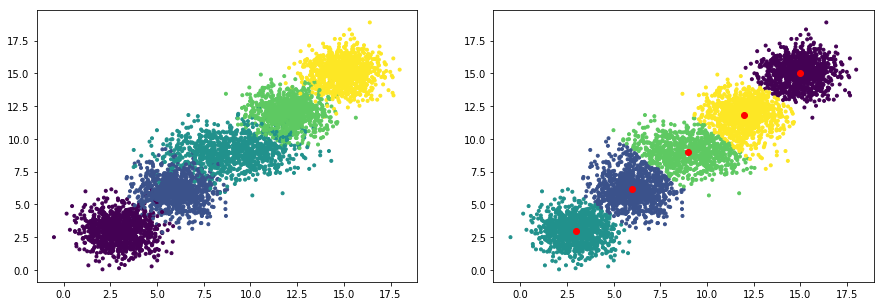

In [4]:
Sigma[:,:,2] = np.array([[3,0],[0, 1]])

plotData_KMeans(N,d,K,p,mi,Sigma)

## c)

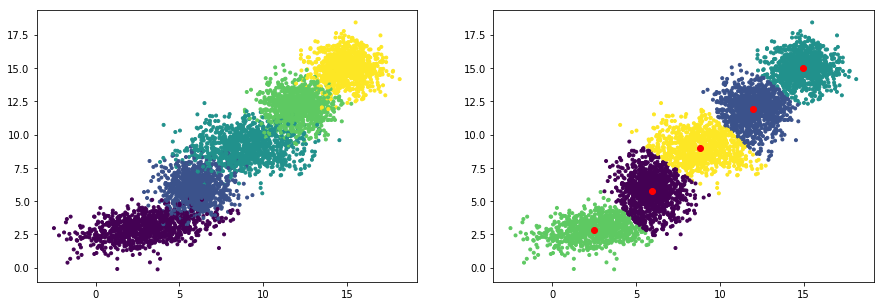

In [5]:
Sigma[:,:,0] = np.array([[3,1],[1,1]])
plotData_KMeans(N,d,K,p,mi,Sigma)

## d)

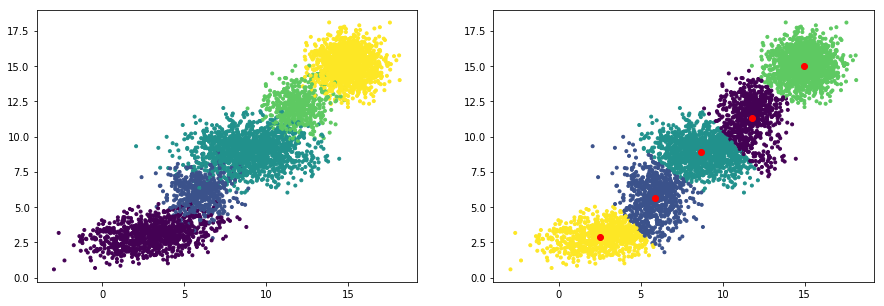

In [6]:
p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
plotData_KMeans(N,d,K,p,mi,Sigma)

## e)

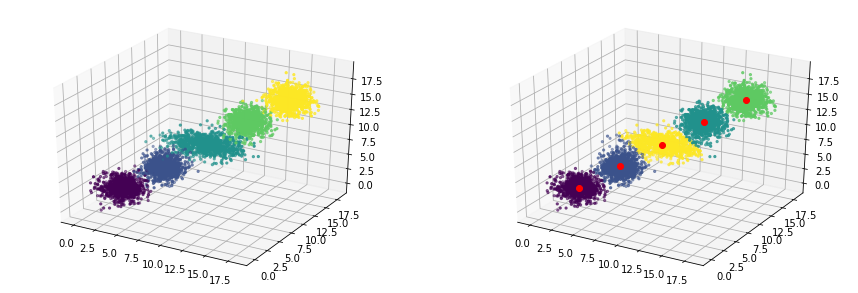

In [9]:
d = 3
K = 5
p = 1/K * np.ones(K)
mi = 3 * np.ones((d,1)) * np.arange(1,K+1)
Sigma = np.array([np.eye(d) for i in range(K)]).T
Sigma[:,:,2] = np.array([[3,1,0],[1,1,0], [0,0,1]]) 

X, groups = generateData(N,d,K,p,mi,Sigma)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(X[0,:], X[1,:], X[2,:], marker='.', c=groups)
ax2 = fig.add_subplot(122, projection='3d')
R, m = KMeans(K, X)
ax2.scatter3D(X[0,:], X[1,:], X[2,:], marker='.', c=m)
ax2.plot3D(R[0,:],R[1,:],R[2,:],'ko', c='red')

## f)

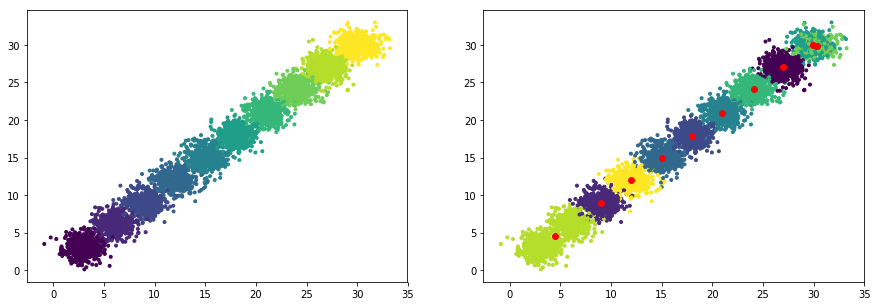

In [16]:
d = 100
K = 10
p = 1/K * np.ones(K)
mi = 3 * np.ones((d,1)) * np.arange(1,K+1)
Sigma = np.array([np.eye(d) for i in range(K)]).T

plotData_KMeans(N,d,K,p,mi,Sigma)